<a href="https://colab.research.google.com/github/robosherpa/NeuralRecon/blob/cvrg-review/A_Review_on_NeuralRecon_at_CVRG_Summer_2021_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

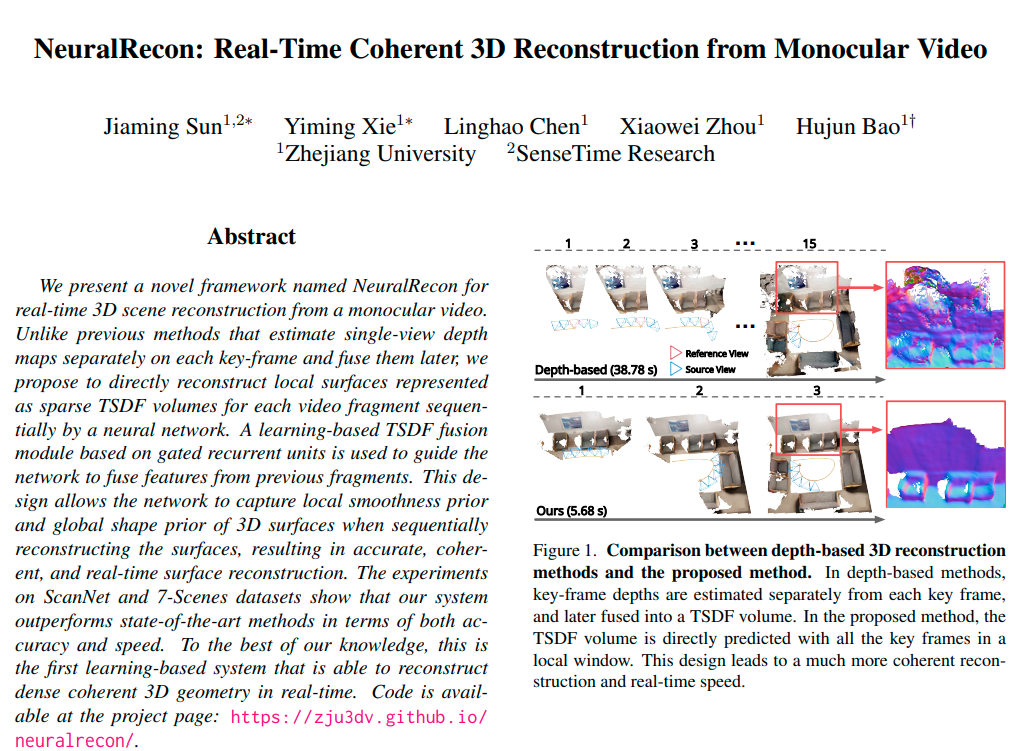



In this notebook, lets review [NeuralRecon](https://zju3dv.github.io/neuralrecon/) paper.

#Real-time Coherent 3D Reconstruction from Monocular Video

### Real-time
### Coherent
### 3D Reconstruction
### Monocular Vision
### Video 

# Previous Methods
### Depthmaps per Frame
### Key Frames
### Optimization

# Proposed System
### Sparse TSDF Volumetric Representation
 Truncated Signed Distance Function 
#### Gated Recurrent Units
- Capture Local Smoothness Prior
- Global Shape Prior
- Sequentially Reconstructing the surfaces
- resulting accurate, coherent, real-time surface reconstruction


### Datasets Used
- ScanNet
- 7-Scenes

### State of the Art Benchmark comparison
- Speed 
- Accuracy

### Authors Claims
The first learning-based system that is able to reconstruct dense coherent 3D geometry in real-time

### Introduction

#### Background
- Augmented Reality (AR)
  - 3D reconstruction for ambience and experience enhancement
  - Accurate, Coherent and performed in real-time
  

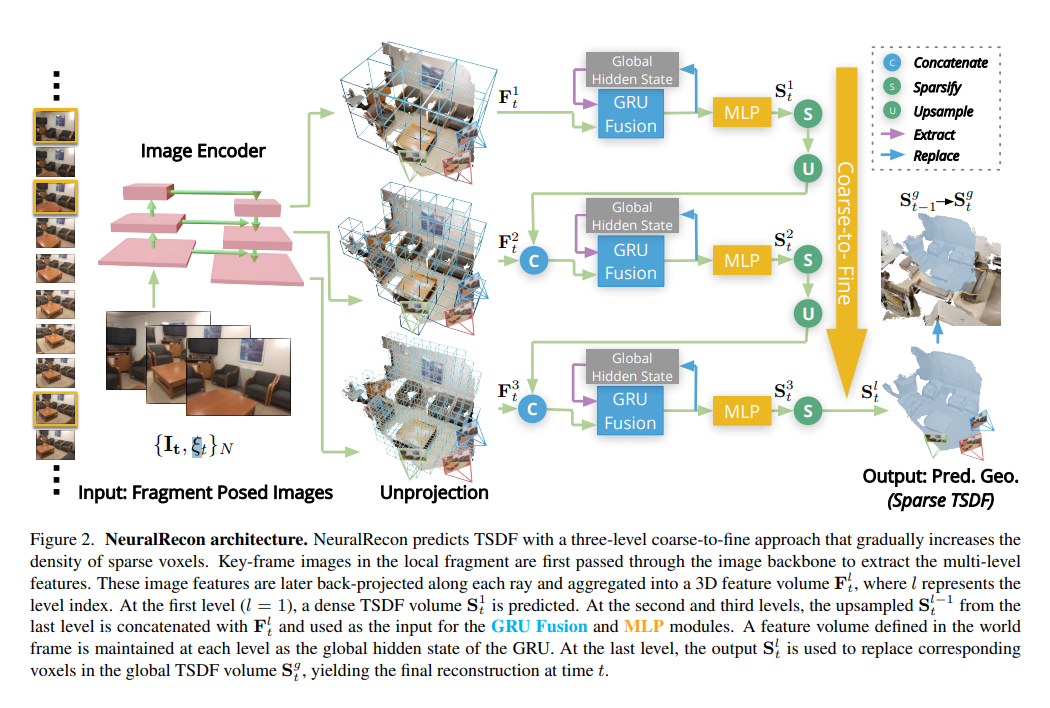

Lets define a mathematical description of the NeuralRecon Architecture.

First, an input stream of images are sampled [_addref]  In Figure 2. Left end of the diagram shows an MLP sampler capturing three samples, Key-frame images, from the input stream $\{I_t,  ξ_t\}_N$ [refer xi sign, ξ ](https://en.wikipedia.org/wiki/Xi_letter)

Mathematically, if we have responses $y_{ij}$ for **unit** $i$ in **group** $j$, with inputs $x_{ij}$, we can construct a model of the form

\\[ p(y_{ij}|x_{ij},\mathbf{w}) = \mathcal Expon(y_{ij}|\mathbf{x_{ij}^T\mu} + \alpha_j) \\]

where, 

- $\mathbf{\mu}$ is the fixed effect, 

- $\alpha_j$ is the random effect, which models variation in the group beyond what is seen in the population. 

- $\mathcal Expon(\mathbf{x}) = \mathbf{\lambda} \times e^{-\lambda \mathbf{x}}$ for $\mathbf{x} >= 0$

- **unit** is defined as in each input data

- and **group** is defined as in possible groups of tasks within each unit input data


More generally, we can rewrite,

\\[ p(y_{ij}|x_{ij},\mathbf{w}) = \mathcal Expon(y_{ij}|\mathbf{x_{ij}^T}\mathbf{\mu} + \mathbf{z_{ij}^T\alpha_j}) \\]

where,
- $\mathbf{z_{ij}}$ are group level features 
- and $\mathbf{x_{ij}}$ are individual-level features.

Now, lets assume $ \mathbf{z_{ij} = x_{ij}} $; we can always ensure this via zero padding as necessary. Next, define $\mathbf{w_{j}} = \mathbf{\mu + \alpha_j}$
 so the model has the form $p(y_{ij}|\mathbf{x_{ij},w}) = \mathcal Expon(y_{ij} | \mathbf{x_{ij}^Tw_j})$. We can think of $\mathbf{w_j}$ as a common contribution $\mu$ plus a group specific perturbation $\alpha_j \sim \mathcal N(\mu, \Sigma)$. Alternatively, we can view it as following hierarchical Bayesian model:

\begin{equation}
y_{ij} \sim  \mathcal{Expon}(\mathbf{w_j^T x_{ij}}) \\
\mathbf{w_j} \sim \mathcal {N}(\mathbf{\mu,\Sigma})
\end{equation}

This setup in Machine Learning is often called multi-task learning. Where,
- $\mathbf{w_j}$ correspond to the parameters of the different tasks. 

MTL in Deep Neural Networks are given in [An Overview of Multi-Task Learning in Deep Neural Networks](https://arxiv.org/pdf/1706.05098.pdf)
Lets continue with our linear mixture model and use the following alternate Loss Function:
\\[ MTL(E | \mathbf{w_j, o_j }) = \arg \min_{w_j} (\frac{1}{J} \sum_{j=0}^{J}(\prod_{i=0}^{I} L_{j}(\mathbf{w_j\mathbf{x_{ij}} + \lambda\mathbf{w_j\Sigma^{-1} w_j^T}})) \\]

where we associate a weighted $\lambda$ sparse factorization $\mathbf{\Sigma}$ as latent regularizer.

It is good to note at this point that, it's been experimentally found that sometimes multi-task learing does worse than solving each task seperately. There was ways around this problem using more flexible priors such as mixture of Gaussians such as Gaussian Processes.


In [ ]:
#SemiDefinite Programming Example OpenCV Library CVPXY
# Import packages.
import cvxpy as cp
import numpy as np

# Generate a random SDP.
n = 7
p = 7
np.random.seed(1)
C = np.random.randn(n, n)
A = []
b = []
for i in range(p):
    A.append(np.random.randn(n, n))
    b.append(np.random.randn())

# Define and solve the CVXPY problem.
# Create a symmetric matrix variable.
X = cp.Variable((n,n), symmetric=True)
# The operator >> denotes matrix inequality.
constraints = [X >> 0]
constraints += [
    cp.trace(A[i] @ X) == b[i] for i in range(p)
]
prob = cp.Problem(cp.Minimize(cp.trace(C @ X)),
                  constraints)
prob.solve()

# Print result.
print("The optimal value is", prob.value)
print("A solution X is")
print(X.value)

References:

[Empirical Evaluation of Rectified Activations in Convolution Network](https://arxiv.org/pdf/1505.00853.pdf)

[Distilling Knowledge in a Neural Network](https://arxiv.org/abs/1503.02531)



# Demo at CVRG

In this section, I attempt to create a demo for the paper discussion. I use local runtime to make use of my PC's GPU to be able to run the solution.

In [ ]:
!mkdir -p /tmp/cvrg/src
!cd /tmp/cvrg/src
!git clone https://github.com/robosherpa/NeuralRecon.git
!cd NeuralRecon
!git checkout cvrg-review
!python .config/